# Project: Investigate a Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The selected dataset has information about 100k medical appointments in Brazil that shows whether a patient showed up to his/her appointment as well as multiple other factors that may affect their showing up. Namely, it provides with each record the following info: PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, No-show.

In this report, investigation will examine the sample data from 110527 of patients to answer the question of whether were any characteristics made patients more likely to show up for their appointments. Statistical tests will be done to identify those characteristics and measure their impact.

In [1]:
# importing statements for all of the needed packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

In [2]:
# Loading data and printing out a few lines.
df = pd.read_csv('noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

We have 110527 rows and 14 columns.

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Above table shows descriptive statistics about each column, the following can be observed:
* Average age for patients is 37 years old with min -1 (meaning we have some invalid age data) and a max of 115 years old, where most of the patients are between 18 and 55 years old.
* 9% of patients have scholership.
* 20% of patients have hypertension.
* 7% of patients have diabetes.
* 3% of patients have alcoholism.
* 2% of patients are handicapped.
* 32% of patients have received SMS about their appointments.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 9.7+ MB


No missing values in any columns, however, multiple cleaning operations can be applied (stated in the next section). 

### Data Cleaning

After basic exploring of the dataset, the following can be applied to clean the data and make it ready for analysis:
* Some columns will be dropped since they don't have a use in the analysis, such as PatientId, AppointmentID.
* There are some age records with negative values, so we will solve that by filling them with the mean.
* No-show column will be changed from Yes and No to 1 and 0 to make it easier to perform numerical operations.

Starting with dropping not usefull columns

In [6]:
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Then, will slove the age column issue, finding out how many records with age <= 0

In [7]:
df[df.Age <= 0].shape

(3540, 12)

we have around 3500 rows with ages <= 0, we will resolve that by filling the age mean

In [8]:
df.loc[df['Age'] <= 0, 'Age'] = df['Age'].mean()
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,38.276780,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,22.104561,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.088874,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Now we have cleaned the age column, we have a min value of 1 year old.

Next, we will replace the No-show columns Yes and No with 1 and 0

In [9]:
df['No-show'] = df['No-show'].apply(lambda x: 0 if x=='No' else 1)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,1,1,0,0,0,0


The dataset is cleaned now ready for being analyzed.

<a id='eda'></a>
## Exploratory Data Analysis

As posed earlier, our main focus here is to answer the following question:

### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

Starting with general exploration

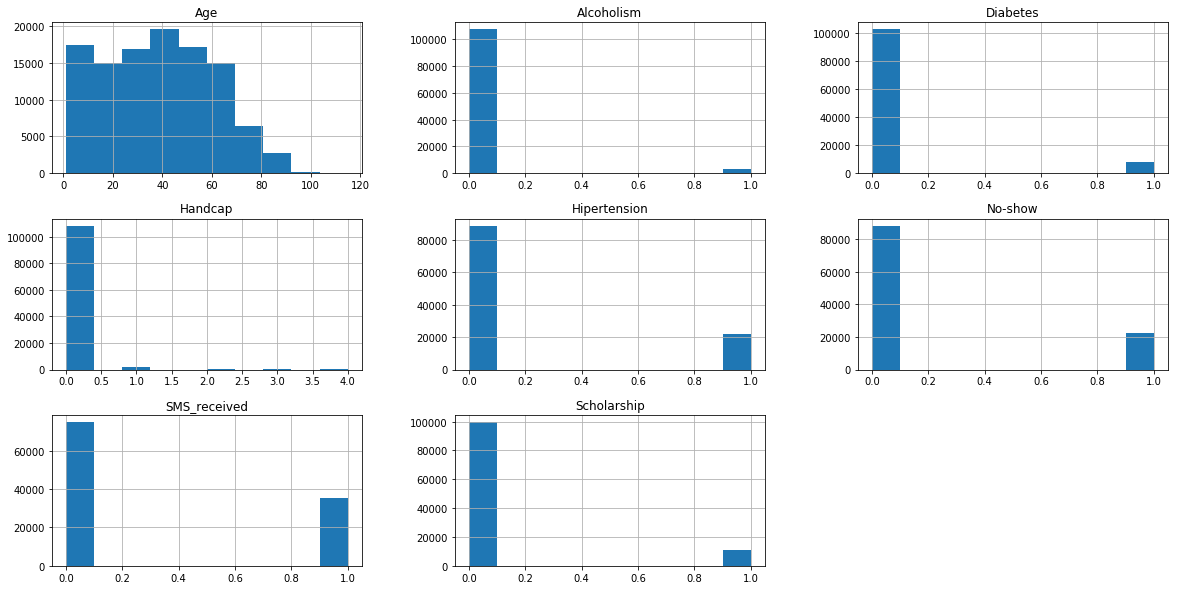

In [10]:
df.hist(figsize=(20, 10));

Above histogram graphs show the following:
* Most patients are with age between 0 and 70.
* Most patients aren't with a specific one type of disease (such as diabetes, hypertension, etc..).
* The majority of patients show up for their appointments (around 90,000 out of the 110,000) while the minority don't show up for their appointments (around 20,000).
* Most of the patients did't recieve SMS.
* Most patients don't have scholarship

In [15]:
# creating two masks for showing and not showing up
showed_up = df['No-show'] == 0
no_show = df['No-show'] == 1

In [ ]:
df[showed_up].mean()

In [ ]:
df[no_show].mean()

The above mean values for columns of the two diffrent groups suggest the following (more investigation will be done):
* Mean age of the patients who showed up tend to be slightly more than the age of the patients who didn't
* Scholership, hypertension, diabetes, alcoholism and being handicapped seem not to or have a very small effect on patients showing up
* SMS received seem to have negative correlation with showing up

In [ ]:
def groupby_barchart(grby, fctr):
    df.groupby(grby)[fctr].mean().plot(kind='bar', grid=True);

In [ ]:
groupby_barchart('No-show', 'SMS_received')
plt.ylabel('Received SMS mean (%)')
plt.xlabel('Showing up')
plt.title('Paitents recieved SMS mean vs. showing up')
ax = plt.gca()
ax.set_xticks([0,1])
ax.set_xticklabels(['No show', 'Show']);

## how many people show for there appointmint?

In [ ]:
(df[no_show].SMS_received.mean(), df[showed_up].SMS_received.mean())

The above bar chart shows that 29% of patients that showed up for their appointments have received SMS and 44% of patients that didn't show up for their appointments have also received SMS, meaning received SMS doesn't contribute positivly in making patients show up for appointments.

## what age of patint didnt show in thier apointment?

In [ ]:
df.Age[no_show].hist(label='No show', alpha=0.9, bins=25)
df.Age[showed_up].hist(label='Showed up', alpha=0.9, bins=25)
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.title('Histogram of age based on showing up')
plt.legend();

In [ ]:
(df[noshow].Age.mean(), df[showedup].Age.mean())

Patients that didn't show up seem to be younger, with an average of 35 years old, and the ones who actually showed up are with average of 39 years old, which means in general the age seem to affect patients showing up.

## did the gender effect patint showing up?

In [ ]:
groupby_barchart('Gender', 'No-show')
plt.ylabel('Showing up rate (%)')
plt.xlabel('Gender')
plt.title('Gender vs. showing up rate')
df.groupby('Gender')['No-show'].mean()

In [ ]:
df.groupby('Gender').Age.count()

Females seems to get ill more in general but both genders seem not to show for their appointments at the same rate, meaining gender doesn't affect patients showing up.

## did the gap between the scheduled day and the appointment day affect patients showing up for their appointments?



In [ ]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['days_in_between'] = (df['AppointmentDay'].dt.date - df['ScheduledDay'].dt.date)

df['days_in_between'] = df['days_in_between'].apply(lambda date: date.days)
df.head(10)

In [ ]:
groupby_barchart('No-show', 'days_in_between')
plt.ylabel('Days gap mean (%)')
plt.xlabel('Showing up')
plt.title('Days gap mean vs. showing up')
ax = plt.gca()
ax.set_xticks([0,1])
ax.set_xticklabels(['No show', 'Show'])

(df[no_show].days_in_between.mean(), df[showed_up].days_in_between.mean())

The above bar chart shows that as the gap between the scheduled day and the appointment day increase the probability for not showing increase as well, in particular, patients that showed up for their appointments have a gap of days with a mean of 15.8% whereas patients that didn't have a gap of days with a mean of 8.8% 

Next, we will see how showing up is correlated with neighbourhood

In [ ]:
df.groupby('Neighbourhood')['No-show'].mean().plot(kind='bar', figsize=(35, 8), grid=True);
plt.ylabel('Showing up rate (%)')
plt.xlabel('Neighbourhoods')
plt.title('Neighbourhoods vs. Showing up rate')

Generally speaking most neighbourhood seem to have showing up rates around 20%, but there are some neighbourhoods that seem to be off like the one with 100% and the one with 0% showing up rates, so lets take a look on the count before judging.

In [ ]:
df.groupby('Neighbourhood')['No-show'].count().plot(kind='bar', figsize=(35, 8), grid=True);
plt.ylabel('Frequency')
plt.xlabel('Neighbourhoods')
plt.title('Neighbourhoods vs. Frequency')

As we can see, the ones that seem to be off are having so little recods which made the showing up rates either 0 or 1. 

Overall, it seems like the neighbourhoods does not affect the patients showing up.

<a id='conclusions'></a>
## Conclusions

The investigation found that, to answer the main posed question of what factors are important in order to predict if a patient will show up for their scheduled appointment, the factors that are likely to be affecting patients showing up are the following:
* The gap between the scheduled day and the appointment day affect patients showing up for their appointments.
* The age of patients (specifically, younger patients are more likely not to show up compared to older patients)

To investigate these findings further, additional analysis could be undertaken, like for example finding the correlation between columns themselves rather than comparing them to independent variable (i.e. the No-show column) and so on.